# Variables Aleatorias Continuas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://storage.needpix.com/rsynced_images/bayesian-2889576_1280.png" width="200px" height="180px" />

> Ahora, centremos nuestra atención en VA continuas.

> A diferencia de las VA discretas, las VA continuas toman valores en un conjunto continuo de valores. Computacionalmente, saltar de discreto a continuo supone reemplazar sumas por integrales.


> **Objetivos:**
> - Repasar la definición de variables aleatorias continuas.
> - Definir la función de densidad de probabilidad y la función de distribución acumulada.
> - Definir el valor esperado (media) de una VA discreta.


> **Referencias:**
> 
> - Pattern Recognition and Machine Learning, by Christopher M. Bishop. Cap 1.2.
> - https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2022/mit18_05_s22_probability.pdf


<p style="text-align:right;"> Imagen recuperada de: https://storage.needpix.com/rsynced_images/bayesian-2889576_1280.png.</p>

___

## 1. Variables aleatorias continuas

También podemos definir probabilidades respecto a **V.A. continuas**

![thermo](https://upload.wikimedia.org/wikipedia/commons/e/e0/Thermometer_-_by_Don.jpg)

- Las variables aleatorias continuas son aquellas que pueden tomar un valores en rangos continuos (subconjuntos de $\mathbb{R}$).

- Un ejemplo de un fenómeno que podemos modelar con una VA continua es la temperatura del presente día.

- En este caso, la manera más conveniente de definir una distribución continua de probabilidad es a través de la Función de Densidad de Probabilidad (PDF - Probability Density Function), la cual asigna un valor no negativo de densidad de probabilidad para cada valor real.

- Como ejemplo, tomamos la distribución normal $X \sim \mathcal{N}(\mu, \sigma^2)$:
  $$
  p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left\{-\frac{(x - \mu)^2}{2 \sigma^2}\right\}.
  $$

In [1]:
# Importar numpy
import numpy as np
# Importar stats de scipy
from scipy import stats
# Importar pyplot
from matplotlib import pyplot as plt

In [7]:
# Definir una VA normal para la temperatura
X = stats.norm(loc=25, scale=2)
# Densidad normal

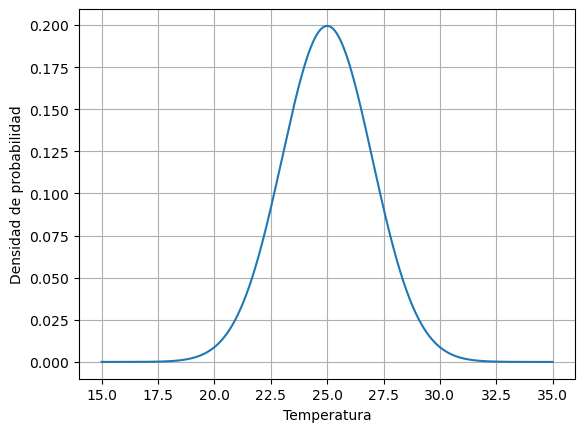

In [8]:
# Graficar
x = np.linspace(15, 35, 1000)
y = X.pdf(x)
plt.plot(x, y)
plt.xlabel('Temperatura')
plt.ylabel('Densidad de probabilidad')
plt.grid()

En el contexto de V.A. continuas no hablamos de función de probabilidad, sino de una **función de densidad de probabilidad p.d.f.** $p(x)$ que debe cumplir

$$
p(x) \geq 0
$$

y

$$
\int_{-\infty}^{\infty} p(x) \mathrm{d}x = 1.
$$

Notemos que en este caso la densidad puede ser mayor a $1$.

Con esto, la probabilidad de que $a \leq X \leq b$ es:

$$
p(a \leq X \leq b) = \int_{a}^{b} p(x) \mathrm{d}x
$$

Definimos también la **función de distribución acumulada c.d.f.** P(x) como:

$$
P(x) = \int_{-\infty}^{x} p(z) \mathrm{d}z,
$$

y respresenta la probabilidad de que $-\infty < X < x$. Por el teorema fundamental del cálculo $P'(x) = p(x)$.

In [9]:
# Verifiquemos lo anterior
X.cdf(np.inf), X.cdf(-np.inf)

(1.0, 0.0)

> **Observaciones.** Todo lo que vimos en el caso discreto se extiende al caso continuo:
>
> - La marginalización, la regla de la cadena, la regla de Bayes, aplican cambiando sumas por integrales y probabilidades por densidades de probabilidad:
>    - $p(x) = \int_{-\infty}^{\infty} p(x, y) \mathrm{d}y$: Marginalización
>    - $p(x, y) = p(y | x) p(x) = p(x | y) p(y)$: Regla de la cadena
>    - $p(x) = \int_{-\infty}^{\infty} p(x | y) p(y) \mathrm{d}y$: Probabilidad total

## 2. Distribuciones específicas

Veamos algunas distribuciones continuas fundamentales. Estas serán de mucha utilidad más adelante.

Para cada una, veremos el soporte, la densidad, la distribución acumulada y una descripción corta de lo que modelan.

### 2.1. Distribución uniforme

1. Parámetros: $a,b$
2. Soporte: $[a, b]$
3. Notación: $\text{Uniform}(a,b)$
4. pdf:
  $$
  p(x)=\frac{1}{b - a} \qquad \text{for } a\leq x\leq b.
  $$
5. cdf:
  $$
  P(x)=\frac{x-a}{b-a}  \qquad \text{for } a\leq x\leq b.
  $$
6. Modela situaciones donde todos los resultados en el soporte tienen igual probabilidad.

**Ejemplo.** Se tiene una cinta de medir con resolución milimétrica. Si medimos la longitud de una varillas que fueron cortadas a 1 metro de longitud, el error de medición estará uniformemente distribuido entre -0.5 y 0.5 milímetros.

In [10]:
stats.uniform?

Signature:       stats.uniform(*args, **kwds)
Type:            uniform_gen
String form:     <scipy.stats._continuous_distns.uniform_gen object at 0x000001FDCDA44A30>
File:            c:\users\esjim\anaconda3\envs\mgp2025_v4\lib\site-packages\scipy\stats\_continuous_distns.py
Docstring:      
A uniform continuous random variable.

In the standard form, the distribution is uniform on ``[0, 1]``. Using
the parameters ``loc`` and ``scale``, one obtains the uniform distribution
on ``[loc, loc + scale]``.

As an instance of the `rv_continuous` class, `uniform` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
log

In [11]:
# Variable aleatoria uniforme
X = stats.uniform(loc=-0.5, scale=1)  # uniforme entre [-0.5, 0.5]

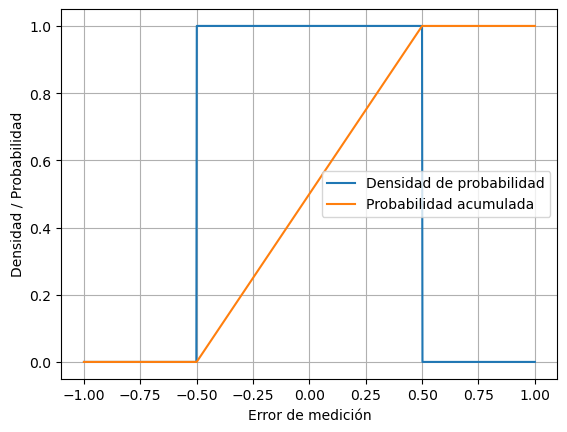

In [13]:
# Gráfico de pdf y cdf
x = np.linspace(-1, 1, 1000)
y1 = X.pdf(x)
y2 = X.cdf(x)
plt.plot(x, y1, label='Densidad de probabilidad')
plt.plot(x, y2, label='Probabilidad acumulada')
plt.xlabel('Error de medición')
plt.ylabel('Densidad / Probabilidad')
plt.legend()
plt.grid()

### 2.2. Distribución exponencial

1. Parámetro $\lambda > 0$.
2. Soporte $[0, \infty)$.
3. Notación $\text{Exponential}(\lambda)$.
4. pdf:
   $$
   p(x) = \lambda e^{-\lambda x} \qquad \text{for } x \geq 0.
   $$
5. cdf:
   $$
   P(x) = 1 - e^{-\lambda x} \qquad \text{for } x \geq 0.
   $$
6. Modela el tiempo de espera de un proceso continuo para cambiar de estado.

**Ejemplo.** Si salen del iteso para tomar un taxi en el Periférico, el tiempo de espera en minutos distribuye exponencialmente. Una buena estimación para $\lambda$ en este caso está dada por $\frac{1}{\text{tiempo de espera promedio}}$.

In [15]:
# Parámetro lambda
lambda_ = 1 / 5

In [16]:
stats.expon?

Signature:       stats.expon(*args, **kwds)
Type:            expon_gen
String form:     <scipy.stats._continuous_distns.expon_gen object at 0x000001FDCD9A6550>
File:            c:\users\esjim\anaconda3\envs\mgp2025_v4\lib\site-packages\scipy\stats\_continuous_distns.py
Docstring:      
An exponential continuous random variable.

As an instance of the `rv_continuous` class, `expon` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, loc=0, scale=1)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more acc

In [17]:
X = stats.expon(scale=1 / lambda_)

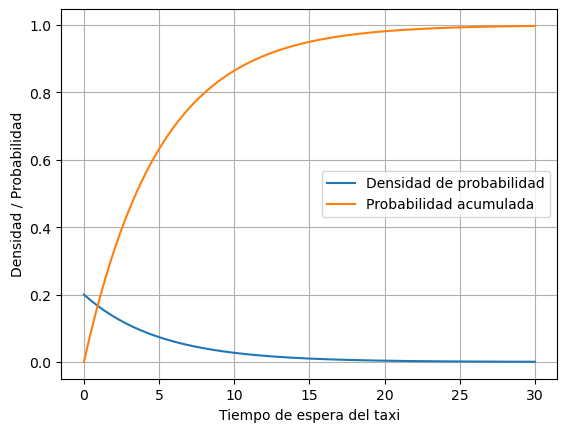

In [20]:
# Gráfico de pdf y cdf
x = np.linspace(0, 30, 1000)
y1 = X.pdf(x)
y2 = X.cdf(x)
plt.plot(x, y1, label='Densidad de probabilidad')
plt.plot(x, y2, label='Probabilidad acumulada')
plt.xlabel('Tiempo de espera del taxi')
plt.ylabel('Densidad / Probabilidad')
plt.legend()
plt.grid()

### 2.3. Distribución normal

1. Parámetros: $\mu,\sigma$
2. Soporte: $(-\infty, \infty)$
3. Notación: $\text{Normal}(\mu,\sigma^2)$
4. pdf:
  $$
  p(x)= \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left\{-\frac{(x - \mu)^2}{2 \sigma^2}\right\}.
  $$
5. cdf: No tenemos una fórmula cerrada para la cdf de una distribución normal. Esta involucra un cálculo numérico que antes era común buscar en tablas, y al día de hoy podemos usar software.
6. Modela: error de medición, altura, promedios de grandes cantidades de datos.

**Ejemplo.** Promedio de temperatura en una zona cerca del Ecuador.

In [26]:
X = stats.norm(loc=25, scale=2)

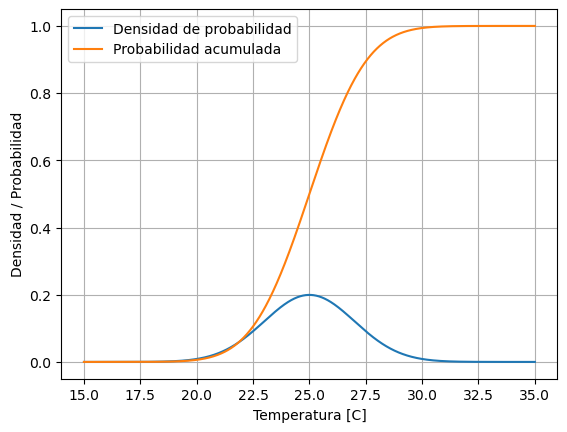

In [27]:
# Gráfico de pdf y cdf
x = np.linspace(15, 35, 1000)
y1 = X.pdf(x)
y2 = X.cdf(x)
plt.plot(x, y1, label='Densidad de probabilidad')
plt.plot(x, y2, label='Probabilidad acumulada')
plt.xlabel('Temperatura [C]')
plt.ylabel('Densidad / Probabilidad')
plt.legend()
plt.grid()

In [28]:
X = stats.norm(loc=0, scale=0.1)

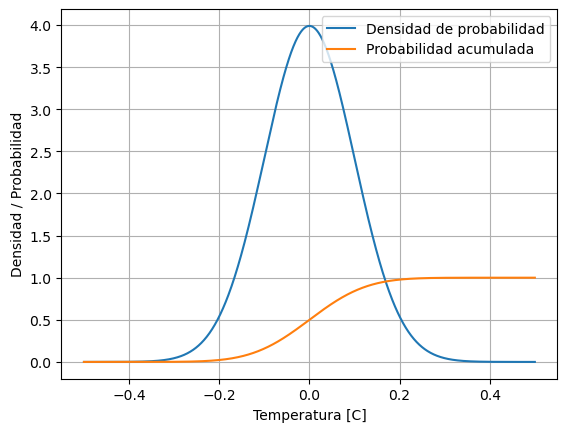

In [30]:
x = np.linspace(-0.5, 0.5, 1000)
y1 = X.pdf(x)
y2 = X.cdf(x)
plt.plot(x, y1, label='Densidad de probabilidad')
plt.plot(x, y2, label='Probabilidad acumulada')
plt.xlabel('Temperatura [C]')
plt.ylabel('Densidad / Probabilidad')
plt.legend()
plt.grid()

## 2. Estadísticos: Valor esperado y varianza
Una de las operaciones más importantes con probabilidades es la de encontrar promedios ponderados de funciones. El **valor esperado** de una función $f(x)$ respecto a una distribución $p(x)$, denotado por $\mathbb{E}_p[f]$, está dado por:

- Para una distribución continua:
  
  $$
  \mathbb{E}_p[f] = \int p(x)f(x) \mathrm{d}x.
  $$
El valor esperado es una *medida de tendencia central*, en el sentido que nos da un valor hacia el cual tiende a agruparse los datos. Una medida de la variabilidad al rededor del valor esperado es **la varianza**, denotada por $\mathrm{var}_p[f]$, que está definida por:

$$
\mathrm{var}_p[f] = \mathbb{E}_p[(f(x) - \mathbb{E}_p[f])^2] = \mathbb{E}_p[f(x)^2] - \mathbb{E}_p[f]^2.
$$


### Ejemplos: Distribuciones normales con diferentes medias, y varianzas

In [31]:
# Definir varias VA normal
X = stats.norm(loc=25, scale=2)
Y = stats.norm(loc=25, scale=5)
Z = stats.norm(loc=30, scale=2)

In [34]:
X.expect(), Y.expect(), Z.expect()

(24.999999999999986, 25.000000000000004, 29.99999999999997)

In [35]:
X.var(), Y.var(), Z.var()

(4.0, 25.0, 4.0)

In [36]:
X.std(), Y.std(), Z.std()

(2.0, 5.0, 2.0)

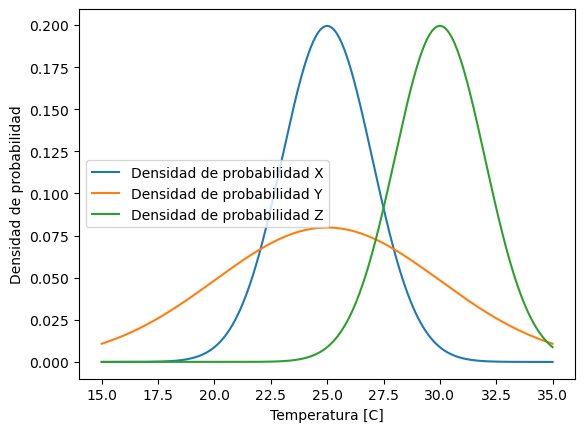

In [33]:
# Gráfico de pdf y cdf
x = np.linspace(15, 35, 1000)
y1 = X.pdf(x)
y2 = Y.pdf(x)
y3 = Z.pdf(x)
plt.plot(x, y1, label='Densidad de probabilidad X')
plt.plot(x, y2, label='Densidad de probabilidad Y')
plt.plot(x, y3, label='Densidad de probabilidad Z')
plt.xlabel('Temperatura [C]')
plt.ylabel('Densidad de probabilidad')
plt.legend()

### Propiedes de la distribución normal

Si $X \sim \text{Normal}(\mu, \sigma^2)$, entonces:

- El valor esperado de $X$ coincide con $\mu$:
  $$
  \mathbb{E}_p[X] = \mu.
  $$

- La varianza $X$ coincide con $\sigma^2$:
  $$
  \mathrm{var}_p[X] = \sigma^2
  $$

# Anuncios parroquiales

### 1. Quiz la siguiente clase.
### 2. [Lectura recomendada](https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2022/mit18_05_s22_class06-prep-b.pdf)
### 2. Tarea 1 para

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>